<a href="https://colab.research.google.com/github/andresgabas/DS-Coderhouse/blob/main/Proyecto%20final_Andres%20Gab%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend --upgrade --no-deps

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

Abstract:

En este proyecto se trabajará con un dataset obtenido del sitio web www.kaggle.com.

El dataset elegido es un archivo .csv que contiene información de pacientes que sufrieron o no infartos (no se aclara la fuente)
El infarto es la segunda causa de muerte más frecuente en el mundo, por lo tanto la posibilidad de crear un modelo que permita la prediccón de un infarto podría prevenir a las personas con riesgo de tomar comsciencia sobre su salud.
Se hará un análisis utilizando diferentes librerías de Python, para conocer la base de datos y ver que variables se podrán utilizar para elaborar un modelo que permita predecir si una persona puede llegar a tener un infarto.

Objetivo:
Desarrollar y entrenar un modelo de Machine Learning que permita predecir si una persona tiene posibilidades de tener un infarto.

Variables incorporadas en el dataset (Entre paréntesis figuran los nombres de las columnas que se utilizarán en el anásisis para mayor comodidad):
*   ID (ID): columna con un número que identifica a cada paciente. Se eliminará ya que no se va a utilizar.
*   Gender (genero): Género, masculino o femenino. el género otro se eliminó por ser poco representativo.
*   Age (edad): Edad de los participantes del estudio. Se considerarán los mayores de 18.
*   Hypertension (hipertension): Hipertenso si(1) o no (0).
*   Heart Disease (enfermedad_corazon): Enfermedad cardíaca si(1) o no (0).
*   Ever married (Casado): Si o no
*   work_type (tipo_trabajo): Tipo de trabajo private, self employed, children, govt job or never worked.
*   Residence_type(tipo_residencia): Urbana o rural.
*   avg_glucose_level(glucosa_promedio): Nivel de glucosa promedio.
*   BMI(IMC): indice de masa muscular. En este caso se eliminarán los valores NaN.
*   smoking_status(fumador): Nunca fumó, desconocido, ex fumador, fumador.
*   stroke(infarto): Tuvo infarto si(1) o no (0).

Se buscará comprobar las siguientes hipótesis
*   Si trabajar con un dataset desequilibrado, puede afectar a la predictabilidad del modelo y conducir a errores en las predicciones.
*   Se buscará avriguar si las variables edad y glucosa promedio son variables que permiten definir un modelo de machine learning para la predictabilidad de los infartos.



   


In [3]:
url = 'https://raw.githubusercontent.com/andresgabas/DS-Coderhouse/main/healthcare-dataset-stroke-data.csv'
Stroke = pd.read_csv(url)


In [4]:
Stroke.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
Stroke.columns = ['Id','genero','edad','hipertension','enfermedad_corazon','casado','tipo_trabajo','tipo_residencia','glucosa_promedio','IMC','fumador','infarto']

De la columna género, se eliminará la fila correspondiente al género "other" porque al ser un único caso , no es representativo.

In [6]:
Stroke = Stroke[Stroke['genero'] != 'Other']

En este paso se eliminarán los valores NaN ya que no aportan al dataset y no podrían ser reemplazados por ceros porque el valor 0 en el indice de masa muscular no tiene sentido.

In [7]:
Stroke = Stroke.dropna(subset=['IMC'])

Dado que consideró los valores de IMC mayores de 50 outliers, se procederá a eliminarlos ya que no se tendrán en cuenta.

In [8]:
Stroke = Stroke[Stroke['IMC'] <= 50]

Se filtrarán los menores de edad ya que aportan más a pacientes sanos, se considerará a futuro hacer un modelo para casos de menores de edad.

In [9]:
Stroke = Stroke[Stroke['edad'] >= 18]

In [10]:
Stroke.count()

Id                    3995
genero                3995
edad                  3995
hipertension          3995
enfermedad_corazon    3995
casado                3995
tipo_trabajo          3995
tipo_residencia       3995
glucosa_promedio      3995
IMC                   3995
fumador               3995
infarto               3995
dtype: int64

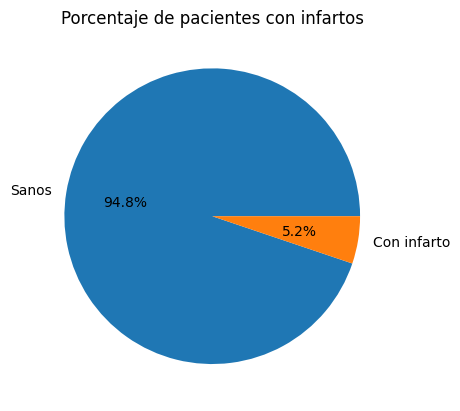

In [11]:
stroke_counts = Stroke['infarto'].value_counts()
plt.pie(stroke_counts, labels=['Sanos', 'Con infarto'], autopct='%1.1f%%')
plt.title('Porcentaje de pacientes con infartos')
plt.show()


Para comenzar se analizó el porcentaje de pacientes que sufrieron un infarto. Se observa en el piechart que solo el 5.2% de los pacientes sufrieron un infarto. Este gráfico nos muestra que el dataset está muy desbalanceado, esto puede generar problemas en la eficacia de nuestro algoritmo.  

Text(0.5, 0, 'Género')

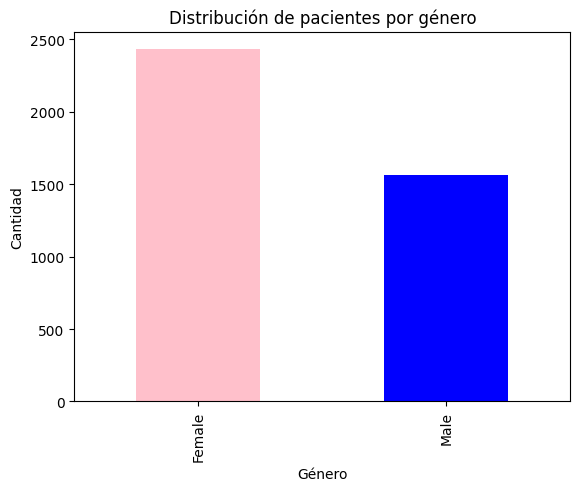

In [12]:
gender_counts = Stroke['genero'].value_counts()
ax = gender_counts.plot(kind='bar', color=['pink','blue'])
ax.set_title('Distribución de pacientes por género')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Género')

En este gráfico se observa que la cantidad de participantes mujeres es mayor que la hombres.

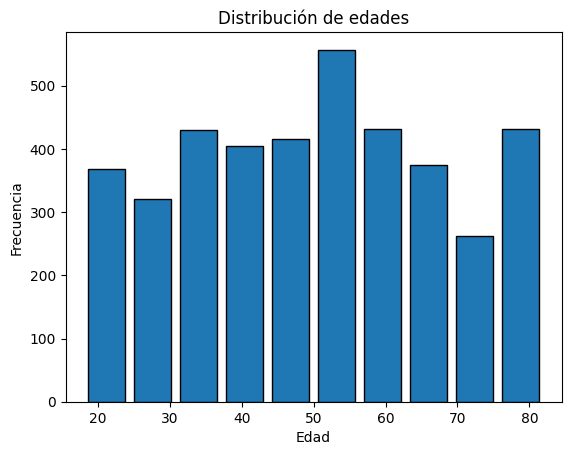

In [13]:
plt.hist(Stroke['edad'], edgecolor='black',rwidth=0.8)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.show()

En este histograma de edades de pacientes se observa que la distribución de la edad los pacientes no es normal. Además podemos observar que la mayoría de los pacientes tienen entre 40 y 60 años, más cerca de los sesenta.


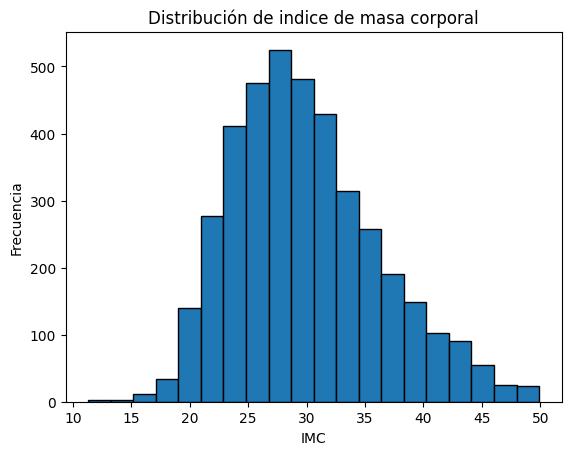

In [14]:
plt.hist(Stroke['IMC'], bins=20, edgecolor='black')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.title('Distribución de indice de masa corporal')
plt.show()

A partir del gráfico de frecuencias del indice de masa corporal observamos una distribución de las muestras corridas hacia la izquierda.
Al principio del análsis se mencionó que es dataset está muy desequilibrado, por lo tanto se tomaran los valores de indice masa corporal mayor a 60 como outliers y no tendrán en cuenta en este análisis.

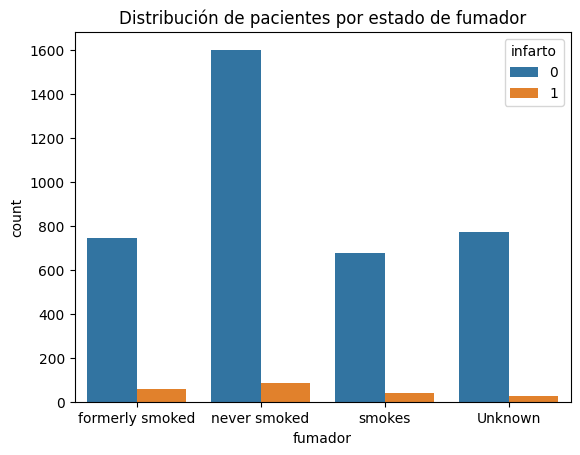

In [15]:
sns.countplot(x='fumador', data=Stroke, hue = 'infarto')
plt.title('Distribución de pacientes por estado de fumador')
plt.show()

En este gráfico gracias al atributo hue que permite agregar una variable más a los ya tenidas en cuenta en el gráfico, podemos decir con seguridad que la mayor parte de los pacientes nunca fumó, también hay una gran porporción de pacientes que se desconoce si fumaron o fuman en la actualidad.


<Axes: xlabel='edad', ylabel='glucosa_promedio'>

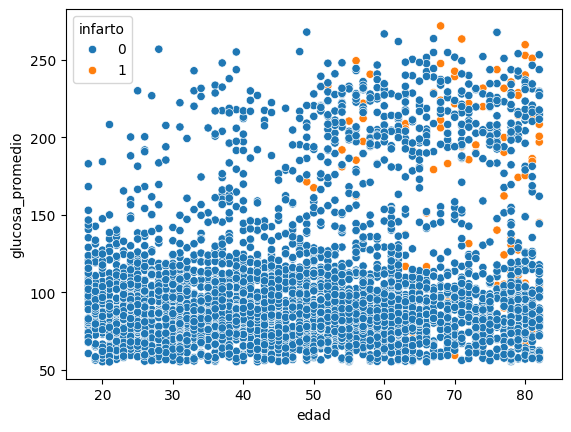

In [16]:
sns.scatterplot(x = 'edad', y = 'glucosa_promedio', data = Stroke, hue = 'infarto')

Se realizó este scatterplot con el objetivo de ver si había una correlación entre la edad y la glucosa promedio, el gráfico no nos aporta ninguna correlación entre estos factores, pero si se observa que la mayoría de los pacientes con infarto, se corresponden con las zonas de alta glucosa promedio y mayor edad.
En este caso gracias al parámetro hue, onbservamos que la mayor parte de los pacientes infartados tienen valores de glucosa altos en su mayoría son mayores de 50 años.

<Axes: xlabel='edad', ylabel='IMC'>

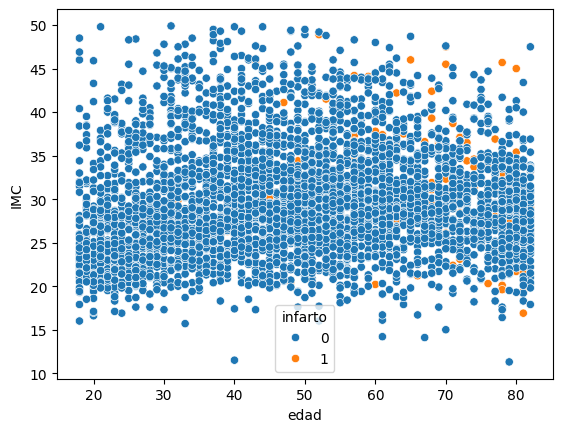

In [17]:
sns.scatterplot(x = 'edad', y = 'IMC', data = Stroke, hue = 'infarto')

En este segundo Scatterplot se trató de ver si existe una correlación entre la edad y el índice de masa muscular pero dada la distribución de los puntos, no se observa una correlación positiva o negativa, sino mas bien una correlación neutra.
Se observa que la mayoría de los pacientes infartados se encuentran en edades mayores a 50 años. sin embargo no se un área clara respecto al índice de masa corporal.

<Axes: xlabel='glucosa_promedio', ylabel='IMC'>

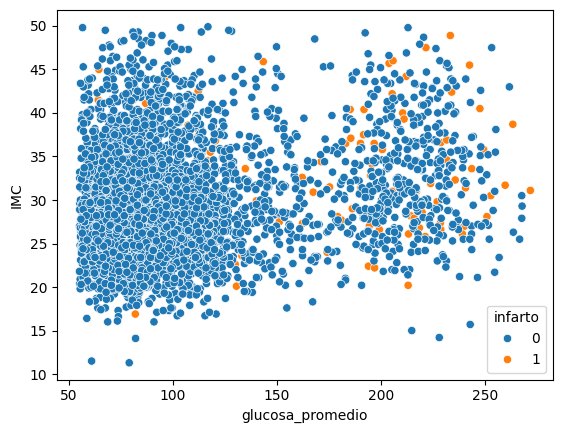

In [18]:
sns.scatterplot(x = 'glucosa_promedio', y = 'IMC', data = Stroke, hue = 'infarto')

En este nuevo Scatterplot se trató de ver si hay una correlación positiva o negativa entre la glucosa promedio y el índice de masa muscular.

En el gráfico no se observa una correlación positiva o negativa.

A partir del EDA, se decidió que las variables que se utilizarán para entrenar el modelo son la edad y la glucosa promedio. Basándome en lo observado en el scatterplot creo que son variables que más información aportan a la hora de diferenciar los casos positivos y los negativos. A pesar de esto no se espera una gran eficiencia de los modelos ya que el dataset está muy desbalanceado.
a continuación se procederá con la validación de los modelos, y se verá cuál de ellos

Luego del análisis exploratorio de datos, se procederá con la validación de los modelos de clasificación utilizando la biblioteca Scikit Learn.

**Logistic Regression:**

In [19]:
X = Stroke[['glucosa_promedio','edad']]
y = Stroke['infarto']

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
cm = confusion_matrix(y_test, preds)
cm

array([[1130,    0],
       [  69,    0]])

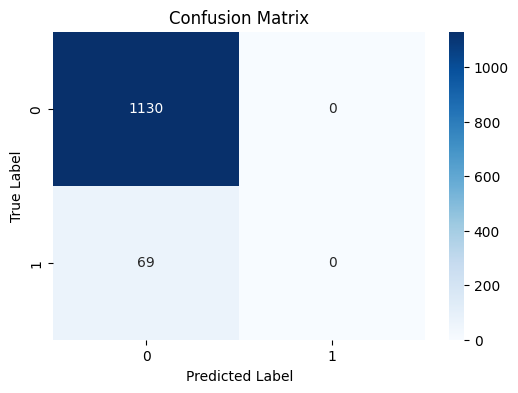

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2658
           1       0.00      0.00      0.00       138

    accuracy                           0.95      2796
   macro avg       0.48      0.50      0.49      2796
weighted avg       0.90      0.95      0.93      2796



In [26]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1130
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1199
   macro avg       0.47      0.50      0.49      1199
weighted avg       0.89      0.94      0.91      1199



Prueba del modelo **Logistic Regression**

In [27]:
X = Stroke[['edad','glucosa_promedio']]
y = Stroke['infarto']

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

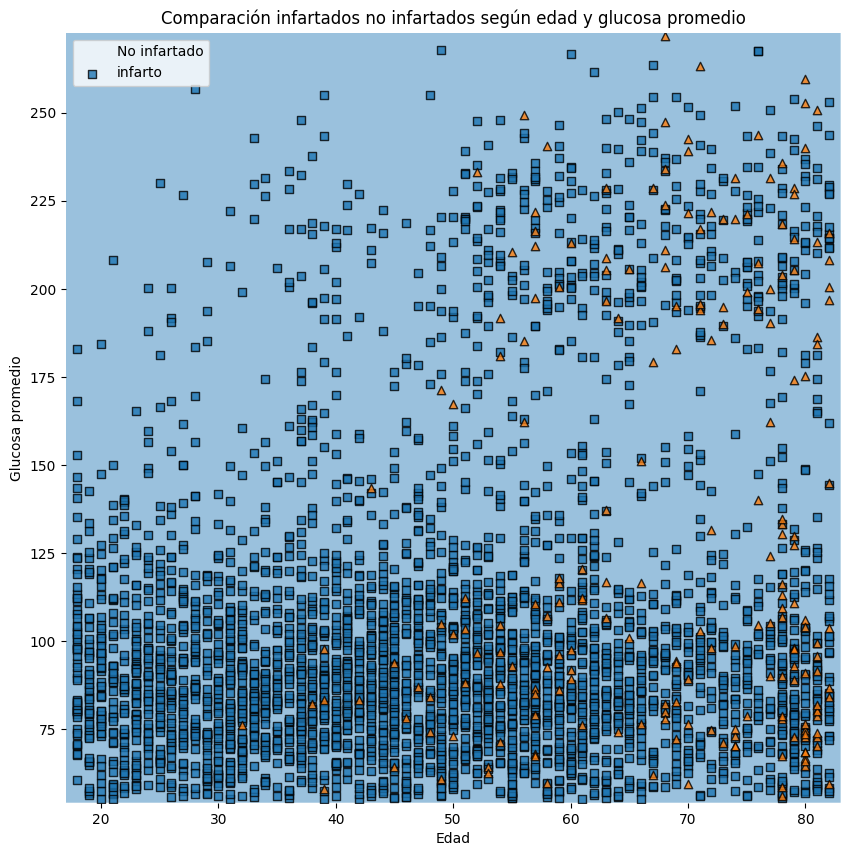

In [30]:
plt.figure(figsize=(10, 10))
ax=plot_decision_regions(X, y, clf=clf)
ax.legend(['No infartado','infarto'])
plt.xlabel('Edad' )
plt.ylabel('Glucosa promedio')
plt.title('Comparación infartados no infartados según edad y glucosa promedio')
plt.show()

Como ya esperabamos a partir de los valores de F1 score obtenidos en la validacion del modelo, con el modelo de Logistic Regression no se logra llegar a zonas de clasificación de pacientes afectados por infartos.   

**Decision Tree classifier:**

In [31]:
X = Stroke[['glucosa_promedio','edad']]
y = Stroke['infarto']

In [32]:
X = np.array(X)
y = np.array(y)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
clf = DecisionTreeClassifier(max_depth=4)
X= Stroke[['edad','glucosa_promedio']]
y= Stroke['infarto']
clf = clf.fit(X, y)

In [34]:
# Se separara en entrenamiento/test en una proporcion 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [35]:
cm = confusion_matrix(y_test, preds)
cm

array([[1125,    5],
       [  67,    2]])

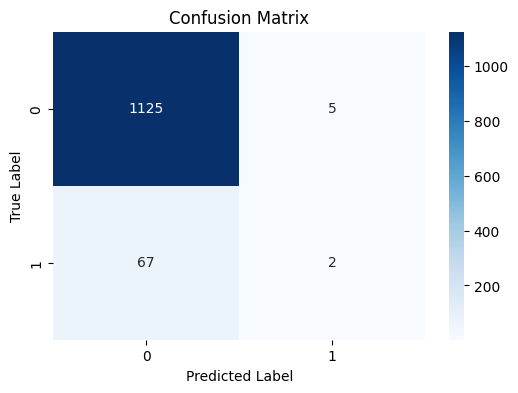

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2658
           1       0.86      0.04      0.08       138

    accuracy                           0.95      2796
   macro avg       0.90      0.52      0.53      2796
weighted avg       0.95      0.95      0.93      2796



In [38]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1130
           1       0.29      0.03      0.05        69

    accuracy                           0.94      1199
   macro avg       0.61      0.51      0.51      1199
weighted avg       0.91      0.94      0.92      1199



Se prueba el modelo **Decision Tree classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
clf = DecisionTreeClassifier(max_depth=4)
X= Stroke[['edad','glucosa_promedio']]
y= Stroke['infarto']
clf = clf.fit(X, y)

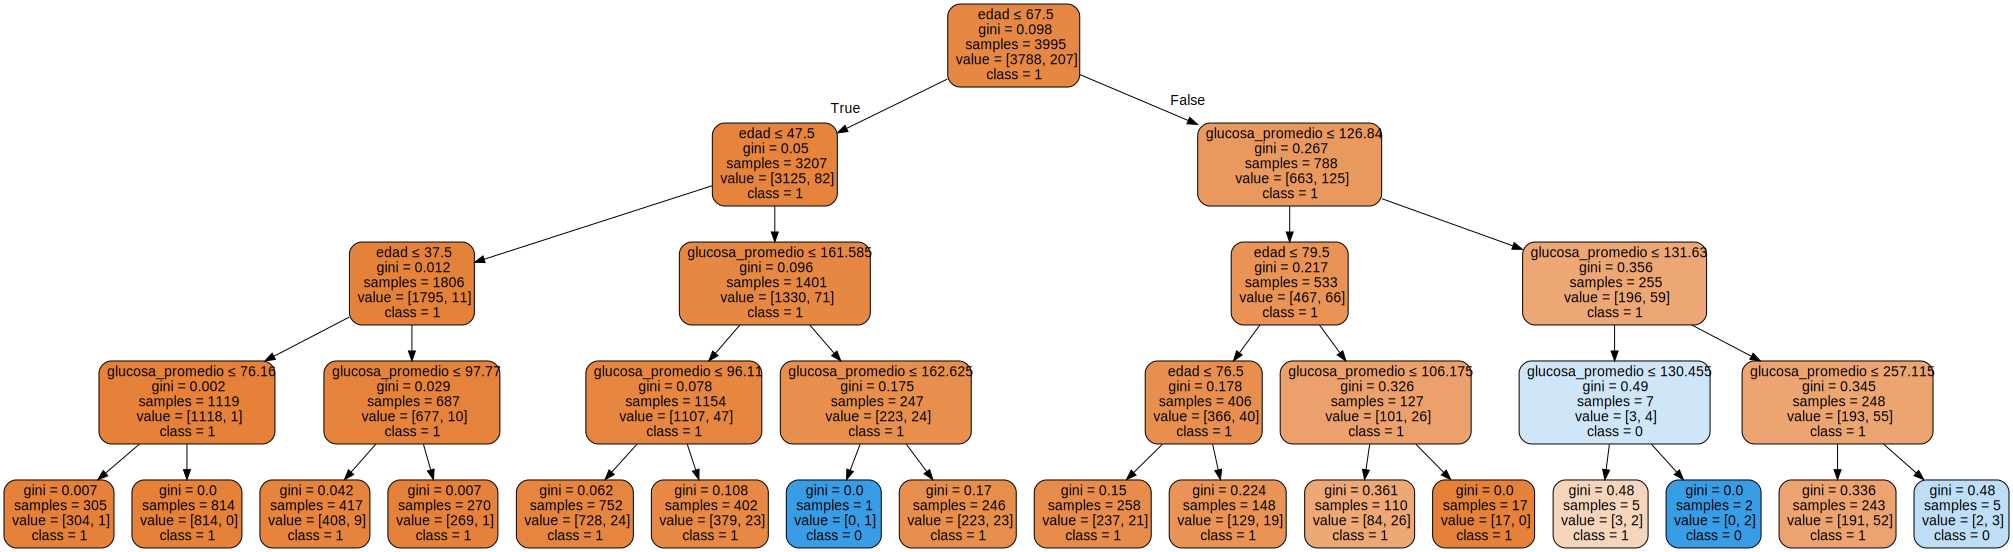

In [40]:
import graphviz
from sklearn import tree

# Convert class names to strings
class_names = [str(name) for name in y.unique()]

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Dado que Decision tree permite agregar mas variables se agregara el indice de masa corporal (IMC) para ver si nos brinda mas informacion y mejora la predictabilidad del modelo.

In [41]:
X = Stroke[['glucosa_promedio','edad','IMC']]
y = Stroke['infarto']

In [42]:
X = np.array(X)
y = np.array(y)

In [44]:
# Se separara en entrenamiento/test en una proporcion 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [45]:
cm = confusion_matrix(y_test, preds)
cm

array([[1127,    3],
       [  68,    1]])

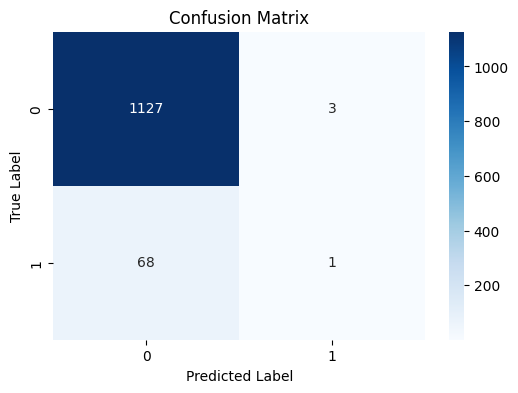

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2658
           1       0.78      0.05      0.10       138

    accuracy                           0.95      2796
   macro avg       0.87      0.52      0.54      2796
weighted avg       0.94      0.95      0.93      2796



In [48]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1130
           1       0.25      0.01      0.03        69

    accuracy                           0.94      1199
   macro avg       0.60      0.51      0.50      1199
weighted avg       0.90      0.94      0.92      1199



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
clf = DecisionTreeClassifier(max_depth=4)
X= Stroke[['edad','glucosa_promedio','IMC']]
y= Stroke['infarto']
clf = clf.fit(X, y)

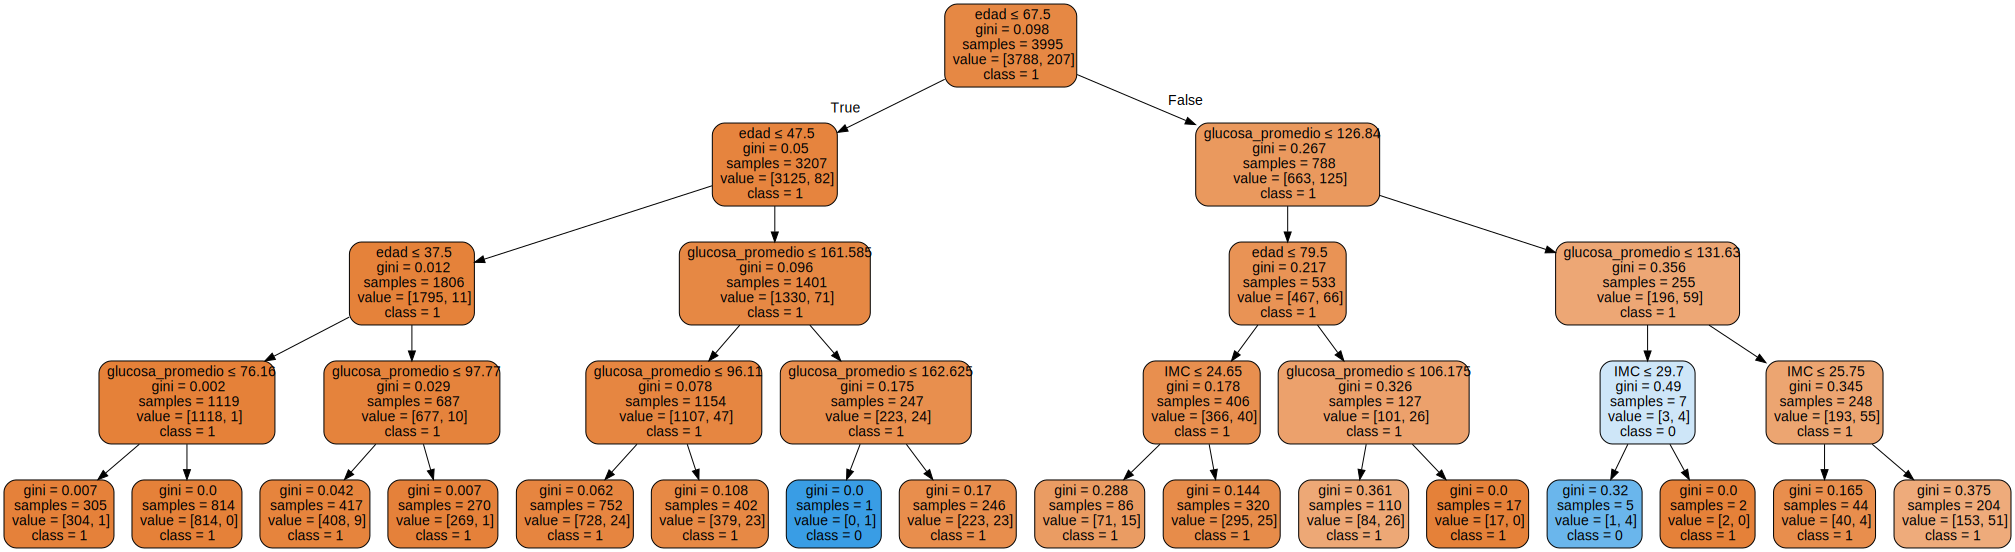

In [50]:
import graphviz
from sklearn import tree
class_names = [str(name) for name in y.unique()]

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Utilizando el modelo decision tree si bien a priori en la validacion los numeros era un poco mejores, el modelo no termina de definir correctamente la poblacion de pacientes infartados respecto a la poblacion de pacientes no infartados.
Se intento agregar una nueva variable, el IMC, dado que este modelo permite agregar mas de 2 variables pero este agregado no sumo al modelo sino por el contrario los valores de F1 Score no mejoraron y en el arbol se siguen observando pocos casos donde no se pudieron diferenciar pacientes infartados de no infatados.

**K Neighbors Classifier**  

Validacion con **n=3**

In [51]:
X = Stroke[['edad','glucosa_promedio']]
y = Stroke['infarto']

In [52]:
X = np.array(X)
y = np.array(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [54]:
cm = confusion_matrix(y_test, preds)
cm

array([[1110,   20],
       [  64,    5]])

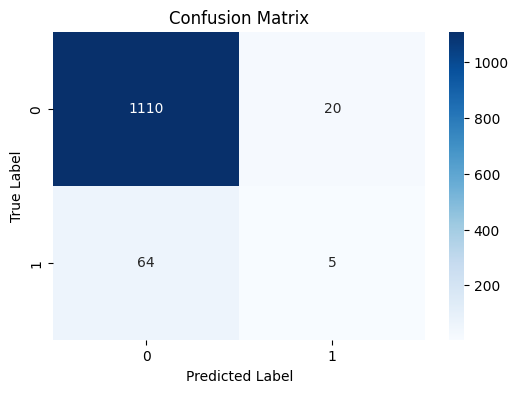

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2658
           1       0.68      0.19      0.30       138

    accuracy                           0.96      2796
   macro avg       0.82      0.59      0.64      2796
weighted avg       0.95      0.96      0.94      2796



In [57]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1130
           1       0.20      0.07      0.11        69

    accuracy                           0.93      1199
   macro avg       0.57      0.53      0.53      1199
weighted avg       0.90      0.93      0.91      1199



Se prueba el modelo **K Neighbors Classifier** con n=3

In [58]:
X = Stroke[['edad','glucosa_promedio']]
y = Stroke['infarto']

In [59]:
X = np.array(X)
y = np.array(y)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

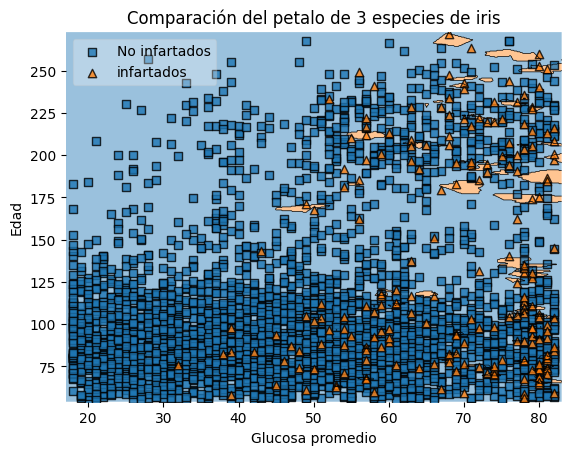

In [61]:
X = np.array(X)
y = np.array(y)

ax=plot_decision_regions(X, y, clf=clf)

plt.xlabel('Glucosa promedio')
plt.ylabel('Edad')
plt.title('Comparación del petalo de 3 especies de iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['No infartados', 'infartados'],
           framealpha=0.3, scatterpoints=1)
plt.show()

Validacion del modelo con **n=5**

In [62]:
X = Stroke[['edad','glucosa_promedio']]
y = Stroke['infarto']

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)

In [65]:
cm = confusion_matrix(y_test, preds)
cm

array([[1124,    6],
       [  67,    2]])

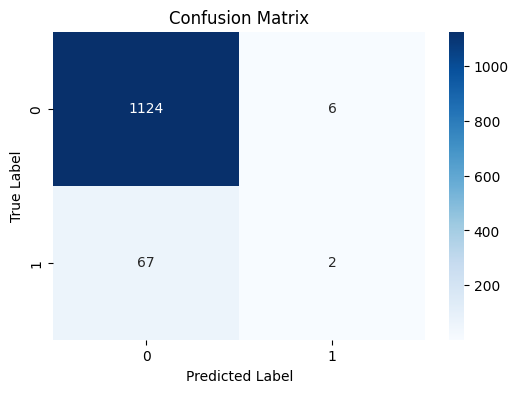

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2658
           1       0.38      0.04      0.07       138

    accuracy                           0.95      2796
   macro avg       0.67      0.52      0.52      2796
weighted avg       0.92      0.95      0.93      2796



In [68]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1130
           1       0.25      0.03      0.05        69

    accuracy                           0.94      1199
   macro avg       0.60      0.51      0.51      1199
weighted avg       0.90      0.94      0.92      1199



Se prueba el modelo **K Neighbors Classifier** con n=5

In [69]:
X = Stroke[['edad','glucosa_promedio']]
y = Stroke['infarto']

In [70]:
X = np.array(X)
y = np.array(y)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier()

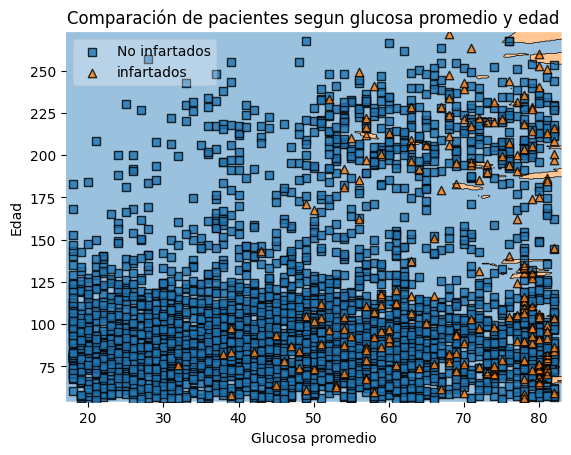

In [72]:
X = np.array(X)
y = np.array(y)

ax=plot_decision_regions(X, y, clf=clf)

plt.xlabel('Glucosa promedio')
plt.ylabel('Edad')
plt.title('Comparación de pacientes segun glucosa promedio y edad')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['No infartados', 'infartados'],
           framealpha=0.3, scatterpoints=1)
plt.show()

El modelo KNN tampoco pudo diferenciar entre pacientes infartados y no infartados, se probo con n=3 y n=5 aun asi no se ve que se pueda aplicar el modelo, el hecho que el dataset tal como se dijo en los modelos previos esté muy desequilibrado no permite una buena clasificacion para el caso en estudio.

**Conclusión:**

A partir de los resultados obtenidos aplicando los 3 modelos, podemos decir que no se logró el objetivo de crear un algoritmo que permita clasificar pacientes en infartados y no infartados y luego poder utilizarse para predecir futuros casos.

Respecto a las hipótesis planteadas:
Hemos podido comprobar que el hecho de utilizar un dataset con un desequilibrio de 95% contra 5% efectivamente afecta a la predictabilidad del modelo. Para poder mejorar lo idea seria conseguir mayor cantidad de datos que permitan equilibrar esa proporción. En el proceso de trabajo tambien se intento eliminar valores outlier (Pacientes menores de edad) lo cual ayudo al balance en muy poca medida.

Respecto al uso de la glucosa promedio y la edad, creo que son variables que podrian ser utiles para el desarrollo del modelo. Creo que la falta de conocimiento medico para el caso de la glucosa promedio no me permitió ver si hay outliers en la muestra además de que se observaron pacientes afectados para varios valores de glucosa.

Pienso que para poder lograr una mejora en el modelo debería explorar mas variables e incluso ver la forma de incluir las variables categoricas en el analisis o ver si hay alguna forma de ver si esas variables categóricas de aspectos médicos se pueden volver variables cuantitativas, por ejemplo la hipertensión en vez de ser si o no, definir rangos de valores de presión arterial para que sea una variable más del análisis. Además intentaria agregar mayor cantidad de datos de afectados por infartos para balancear el dataset y permitir la mejora del F1 score de pacientes afectados que en todos los modelos estudiados fue muy bajo y nulo en casos.